<a href="https://colab.research.google.com/github/mohammedterry/NLP_for_ML/blob/master/EmbeddingGraphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Util Functions

In [0]:
from typing import List, Set

from sklearn.decomposition import PCA
from seaborn import set_style, regplot
from pandas import DataFrame

def plot_graph(vectors:List[List[int]], labels:List[str], colours:List[str]=None) -> None:
  """ 
  a labelled 2D plot of graph embeddings 
  (pca used to reduce vector dimensions) 
  """

  pca = PCA(n_components=2)  
  set_style("whitegrid")
  
  data = DataFrame(
    data = pca.fit_transform(vectors), 
    columns = ['x_coordinate','y_coordinate']
  )
  graph=regplot(
      data=data, 
      x="x_coordinate", 
      y="y_coordinate", 
      fit_reg=False, 
      scatter_kws= {'facecolors':colours},
      marker="+"
  )

  adjusted_x_coordinates = []
  offsets = {}
  for x in data['x_coordinate']:
    x = round(x,2)
    if x in offsets:
      offsets[x] += .1
    else:
      offsets[x] = 0
    adjusted_x_coordinates.append(x + offsets[x])

  [
   graph.text(*xylabel) for xylabel in zip(
      adjusted_x_coordinates,
      data['y_coordinate'],
      labels
    )
  ]


In [3]:
def one_hot_encoding(indexes:Set[int], vector_length:int) -> List[int]:
  return list(map(lambda index: int(index in indexes), range(vector_length)))

one_hot_encoding(indexes={2,5},vector_length=10)

[0, 0, 1, 0, 0, 1, 0, 0, 0, 0]

In [0]:
from networkx import Graph, draw

def create_graph(connections:List[int],colours:List[str]=None) -> Graph:
  graph = Graph()
  for start_node,end_nodes in enumerate(connections):
    if not isinstance(end_nodes,list):
      end_nodes = [end_nodes]
    for end_node in end_nodes:
      graph.add_edge(start_node,end_node)
    
  draw(graph, node_color=colours, with_labels=True)
  return graph

# An Example Graph

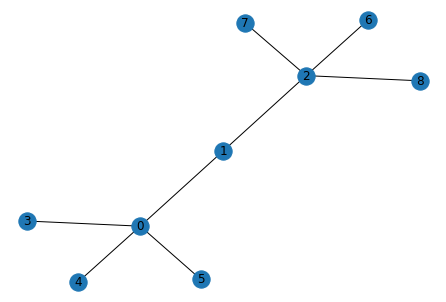

In [5]:
graph1 = create_graph(connections = [0, 0, 1, 0, 0, 0, 2, 2, 2])

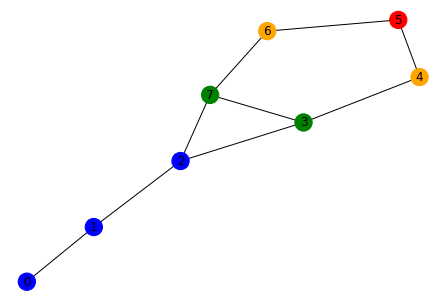

In [6]:
colours_for_graph2 = ['blue','blue','blue','green','orange','red','orange','green']
graph2 = create_graph(connections = [1,2,3,4,5,6,7,[2,3]], colours = colours_for_graph2)

# Graph Embedding (Edges)

In [0]:
def create_vectors_from_edges(graph:Graph) -> List[List[int]]:
  return [
    [
      int(node in edge) for edge in graph.edges
    ]  for node in graph.nodes
  ]

In [9]:
create_vectors_from_edges(graph1)

[[1, 1, 1, 1, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1]]

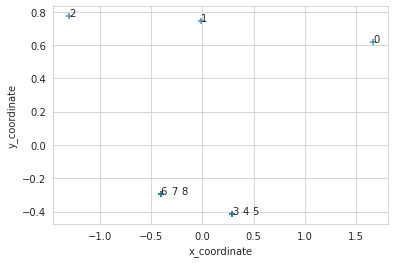

In [13]:
plot_graph(
  vectors = create_vectors_from_edges(graph1),
  labels = map(str,range(len(graph1.nodes)))
)

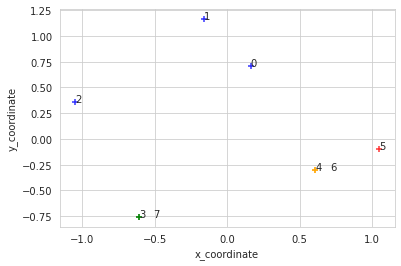

In [14]:
plot_graph(
  vectors = create_vectors_from_edges(graph2),
  labels = map(str,range(len(graph2.nodes))),
  colours = colours_for_graph2
)

# Graph Embedding (Adjacent Nodes)

In [0]:
def create_vectors_from_adjacent_nodes(graph:Graph) -> List[List[int]]:
  adjacent_nodes = [
    set(graph[node_id].keys()) | {node_id} for node_id in graph.nodes
  ]
  return list(
    map(
      lambda neighbours: one_hot_encoding(
          indexes=neighbours, 
          vector_length=len(graph.nodes)
      ), 
      adjacent_nodes
    )
  )

In [16]:
create_vectors_from_adjacent_nodes(graph1)

[[1, 1, 0, 1, 1, 1, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 0, 0, 0, 1, 1, 1],
 [1, 0, 0, 1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 1, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 1]]

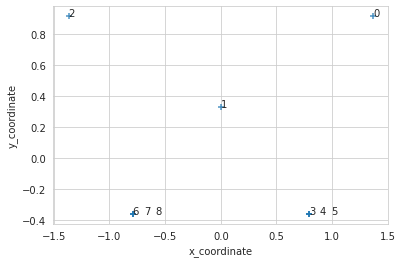

In [17]:
plot_graph(
  vectors = create_vectors_from_adjacent_nodes(graph1),
  labels = map(str,range(len(graph1.nodes)))
)

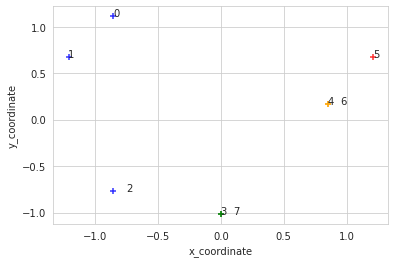

In [18]:
plot_graph(
  vectors = create_vectors_from_adjacent_nodes(graph2),
  labels = map(str,range(len(graph2.nodes))),
  colours = colours_for_graph2
)

# Graph Embedding (All Nodes)

In [0]:
from networkx import shortest_path_length
from math import exp

def sigmoid(x:float) -> float:
  return 1 / (1 + exp(-x))

def create_vectors_from_all_nodes(graph:Graph) -> List[List[int]]:
  return [
    [
      sigmoid(shortest_path_length(graph, node_start, node_end)) for node_end in graph.nodes
    ] for node_start in graph.nodes
  ]

In [20]:
create_vectors_from_all_nodes(graph2)

[[0.5,
  0.7310585786300049,
  0.8807970779778823,
  0.9525741268224334,
  0.9820137900379085,
  0.9933071490757153,
  0.9820137900379085,
  0.9525741268224334],
 [0.7310585786300049,
  0.5,
  0.7310585786300049,
  0.8807970779778823,
  0.9525741268224334,
  0.9820137900379085,
  0.9525741268224334,
  0.8807970779778823],
 [0.8807970779778823,
  0.7310585786300049,
  0.5,
  0.7310585786300049,
  0.8807970779778823,
  0.9525741268224334,
  0.8807970779778823,
  0.7310585786300049],
 [0.9525741268224334,
  0.8807970779778823,
  0.7310585786300049,
  0.5,
  0.7310585786300049,
  0.8807970779778823,
  0.8807970779778823,
  0.7310585786300049],
 [0.9820137900379085,
  0.9525741268224334,
  0.8807970779778823,
  0.7310585786300049,
  0.5,
  0.7310585786300049,
  0.8807970779778823,
  0.8807970779778823],
 [0.9933071490757153,
  0.9820137900379085,
  0.9525741268224334,
  0.8807970779778823,
  0.7310585786300049,
  0.5,
  0.7310585786300049,
  0.8807970779778823],
 [0.9820137900379085,
  0.95

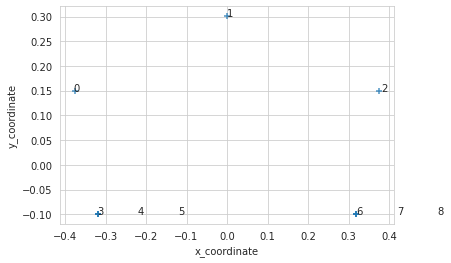

In [21]:
plot_graph(
  vectors = create_vectors_from_all_nodes(graph1),
  labels = map(str,range(len(graph1.nodes)))
)

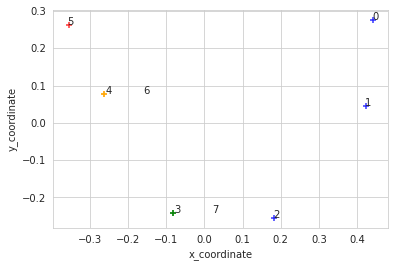

In [22]:
plot_graph(
  vectors = create_vectors_from_all_nodes(graph2),
  labels = map(str,range(len(graph2.nodes))),
  colours = colours_for_graph2
)

# Graph Embedding (Parent Nodes)

In [0]:
from networkx import all_shortest_paths
from functools import reduce 
from typing import Set

def get_all_parent_nodes(graph:Graph,node_start:int, node_end:int, include_node_end:bool) -> Set[int]:
  parent_nodes = reduce(
    lambda path_a,path_b: set(path_a)|set(path_b), 
    all_shortest_paths(graph,node_start,node_end)
  )
  return parent_nodes if include_node_end else set(parent_nodes) ^ {node_end}

def create_vectors_from_parent_nodes(graph:Graph, root_node:int = 0, include_current_node:bool=True) -> List[List[int]]:
  all_parent_nodes = map(
    lambda current_node: get_all_parent_nodes(graph, root_node, current_node, include_current_node), 
    graph.nodes()
  )
  return list(
    map(
      lambda parent_nodes: one_hot_encoding(
          indexes=parent_nodes, 
          vector_length=len(graph.nodes)
      ), 
      all_parent_nodes
    )
  )

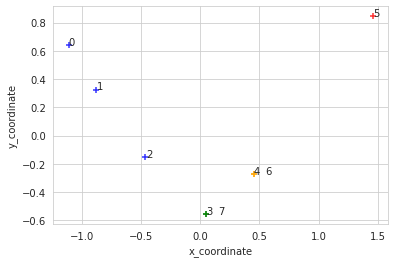

In [75]:
plot_graph(
  vectors = create_vectors_from_parent_nodes(graph2, include_current_node=False),
  labels = map(str,range(len(graph2.nodes))),
  colours = colours_for_graph2
)

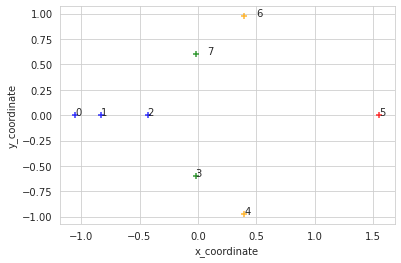

In [71]:
plot_graph(
  vectors = create_vectors_from_parent_nodes(graph2),
  labels = map(str,range(len(graph2.nodes))),
  colours = colours_for_graph2
)

# Graph Embedding (Random-Walk)

In [0]:
from random import choice

def random_walk(node:int,steps:int, graph:Graph) -> List[str]:
  path = []
  for _ in range(steps):
    path.append(str(node))
    adjacent_nodes = list(graph[node])
    node = choice(adjacent_nodes)
  return path

In [24]:
def generate_training_set(graph:Graph, random_walk_repeats:int, random_walk_path_length:int) -> List[List[str]]:
  return [
    random_walk(
      node = node,
      steps = random_walk_path_length,
      graph = graph
    ) for node in graph.nodes for _ in range(random_walk_repeats)
  ]
generate_training_set(graph1,2,10)

[['0', '4', '0', '0', '5', '0', '3', '0', '1', '0'],
 ['0', '3', '0', '3', '0', '1', '0', '4', '0', '1'],
 ['1', '2', '7', '2', '8', '2', '7', '2', '8', '2'],
 ['1', '0', '5', '0', '1', '0', '3', '0', '1', '2'],
 ['2', '6', '2', '7', '2', '7', '2', '1', '0', '1'],
 ['2', '7', '2', '8', '2', '8', '2', '8', '2', '6'],
 ['3', '0', '0', '5', '0', '4', '0', '0', '0', '5'],
 ['3', '0', '5', '0', '5', '0', '1', '0', '0', '0'],
 ['4', '0', '5', '0', '5', '0', '5', '0', '0', '1'],
 ['4', '0', '0', '0', '3', '0', '4', '0', '1', '0'],
 ['5', '0', '4', '0', '0', '4', '0', '0', '3', '0'],
 ['5', '0', '5', '0', '5', '0', '5', '0', '1', '0'],
 ['6', '2', '7', '2', '1', '2', '7', '2', '1', '2'],
 ['6', '2', '6', '2', '7', '2', '1', '0', '5', '0'],
 ['7', '2', '8', '2', '1', '2', '8', '2', '1', '0'],
 ['7', '2', '7', '2', '7', '2', '6', '2', '7', '2'],
 ['8', '2', '6', '2', '1', '0', '4', '0', '0', '5'],
 ['8', '2', '1', '0', '5', '0', '3', '0', '3', '0']]

In [0]:
from gensim.models import Word2Vec

def create_vectors_from_random_walks(graph:Graph) -> List[List[float]]:
  skipgram_model = Word2Vec(window = 4, sg = 1, hs = 0,negative = 10, alpha=.03, min_alpha=.0007, seed = 14)
  training_set_for_graph = generate_training_set(graph,30,40)
  skipgram_model.build_vocab(training_set_for_graph, progress_per=2)
  skipgram_model.train(
    training_set_for_graph, 
    total_examples = skipgram_model.corpus_count, 
    epochs=20, 
    report_delay=1
  )
  return skipgram_model[list(map(str,graph.nodes))]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


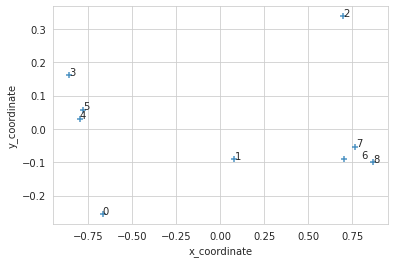

In [156]:
plot_graph(
  vectors = create_vectors_from_random_walks(graph1),
  labels = map(str,range(len(graph1.nodes)))
)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


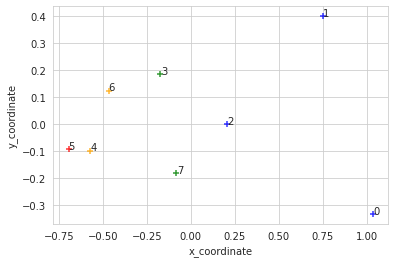

In [155]:
plot_graph(
  vectors = create_vectors_from_random_walks(graph2),
  labels = map(str,range(len(graph2.nodes))),
  colours = colours_for_graph2
)

### Node2Vec

In [29]:
!pip3 install node2vec

In [0]:
from node2vec import Node2Vec

def create_vectors_node2vec(graph:Graph) -> List[List[float]]:
  node2vec = Node2Vec(graph, dimensions=64, walk_length=30, num_walks=200, workers=4)  
  model = node2vec.fit(window=10, min_count=1, batch_words=4) 
  return model[list(map(str,graph.nodes))]

Computing transition probabilities: 100%|██████████| 9/9 [00:00<00:00, 5358.99it/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


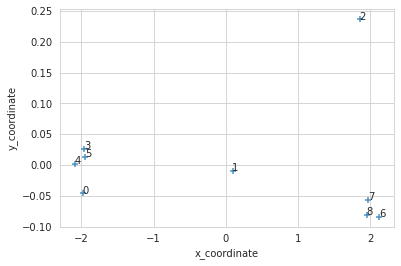

In [31]:
plot_graph(
  vectors = create_vectors_node2vec(graph1),
  labels = map(str,range(len(graph1.nodes)))
)

Computing transition probabilities: 100%|██████████| 8/8 [00:00<00:00, 4946.84it/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


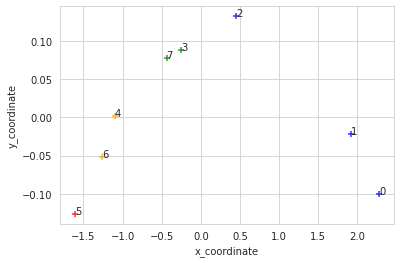

In [32]:
plot_graph(
  vectors = create_vectors_node2vec(graph2),
  labels = map(str,range(len(graph2.nodes))),
  colours = colours_for_graph2
)

# WordNet Embeddings

In [90]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Parent Node Method

In [0]:
def get_all_parent_nodes_wordnet(start_synset, include_node_end:bool) -> list:
  parent_nodes = list(
    start_synset.closure(lambda synset: synset.hypernyms())
  )
  return [start_synset] + parent_nodes if include_node_end else parent_nodes

In [277]:
example_synset = wordnet.synsets("dog")[0]
parent_nodes = get_all_parent_nodes_wordnet(example_synset,include_node_end=True)
parent_nodes

[Synset('dog.n.01'),
 Synset('canine.n.02'),
 Synset('domestic_animal.n.01'),
 Synset('carnivore.n.01'),
 Synset('animal.n.01'),
 Synset('placental.n.01'),
 Synset('organism.n.01'),
 Synset('mammal.n.01'),
 Synset('living_thing.n.01'),
 Synset('vertebrate.n.01'),
 Synset('whole.n.02'),
 Synset('chordate.n.01'),
 Synset('object.n.01'),
 Synset('physical_entity.n.01'),
 Synset('entity.n.01')]

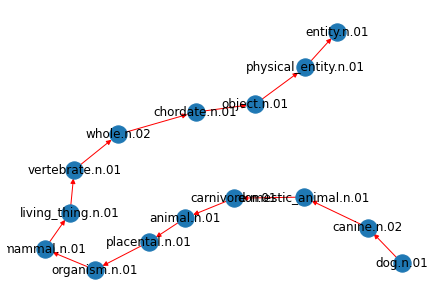

In [287]:
from networkx import DiGraph

graph = DiGraph()

for node,parent in zip(parent_nodes, parent_nodes[1:]):
  graph.add_edge(node.name(), parent.name())

draw(graph, edge_color='r', with_labels=True)

### Random-Walk method

In [0]:
def get_all_related_synsets(synset) -> list:
  return synset.hypernyms() + synset.hyponyms() + synset.part_meronyms() +\
  synset.substance_meronyms() + synset.member_meronyms() + synset.part_holonyms() +\
  synset.substance_holonyms() + synset.member_holonyms() + synset.topic_domains() +\
  synset.region_domains() + synset.usage_domains() + synset.entailments() +\
  synset.causes() + synset.also_sees() + synset.verb_groups() + synset.similar_tos()

In [0]:
def random_walk_wordnet(synset,steps:int) -> List[str]:
  path = []
  for _ in range(steps):
    path.append(synset.name())
    adjacent_nodes = get_all_related_synsets(synset)
    if adjacent_nodes:
      synset = choice(adjacent_nodes)
    else:
      break
  return path

In [327]:
example_synset = wordnet.synsets("dog")[0]
random_walk_wordnet(example_synset, 10)

['dog.n.01',
 'canis.n.01',
 'dog.n.01',
 'canis.n.01',
 'dog.n.01',
 'pack.n.06',
 'animal_group.n.01',
 'drove.n.01',
 'animal_group.n.01',
 'warren.n.05']

In [0]:
def generate_training_set_wordnet(random_walk_repeats:int, random_walk_path_length:int) -> List[List[str]]:
  return [
    random_walk_wordnet(
      synset = synset,
      steps = random_walk_path_length,
    ) for synset in wordnet.all_synsets() for _ in range(random_walk_repeats)
  ]

In [0]:
def create_vectors_from_random_walk_wordnet() -> Tuple[List[str],List[float]]:
  skipgram_model = Word2Vec(window = 4, sg = 1, hs = 0,negative = 10, alpha=.03, min_alpha=.0007, seed = 14)
  training_set_for_graph = generate_training_set_wordnet(2, 5)
  skipgram_model.build_vocab(training_set_for_graph, progress_per=2)
  skipgram_model.train(
    training_set_for_graph, 
    total_examples = skipgram_model.corpus_count, 
    epochs=20, 
    report_delay=1
  )
  vocabulary = list(skipgram_model.wv.vocab.keys())
  return vocabulary, list(
    skipgram_model[vocabulary]
  )

In [331]:
wordnet_vocabulary, wordnet_vectors = create_vectors_from_random_walk_wordnet()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


In [332]:
len(wordnet_vocabulary)

81512

In [333]:
len(wordnet_vectors)

81512

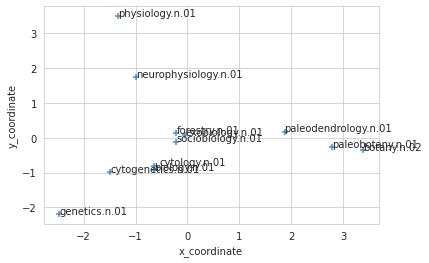

In [340]:
plot_graph(
  vectors = wordnet_vectors[:12],
  labels = wordnet_vocabulary[:12],
)

In [0]:
from numpy import mean, zeros_like

def get_wordnet_vector_for_word(word:str, vocabulary:List[str], vectors:List[List[float]]) -> List[float]:
  possible_synsets_for_word = [
    synset.name() for synset in wordnet.synsets(word) if synset.name() in vocabulary
  ]
  if possible_synsets_for_word:
    synset_indexes = map(
      lambda synset_name :vocabulary.index(synset_name),
      possible_synsets_for_word
    )
    possible_vectors = map(
      lambda index : vectors[index],
      synset_indexes
    )
    return mean(list(possible_vectors), axis=0)
  return zeros_like(vectors[0])

In [373]:
get_wordnet_vector_for_word("cat", wordnet_vocabulary, wordnet_vectors)

array([-0.0574913 ,  0.07957515,  0.3491341 ,  0.17068674, -0.3621271 ,
       -0.08846668,  0.00635384,  0.09522622,  0.19410779,  0.05792175,
        0.12355735,  0.20431311, -0.1800737 , -0.26895282, -0.12390616,
        0.11764129,  0.18188459,  0.2829374 ,  0.01008003,  0.11990938,
       -0.50398767, -0.17844267, -0.00980711,  0.36515486,  0.16770865,
        0.0503007 , -0.20097764, -0.11769891,  0.15714751,  0.06426179,
        0.2527846 ,  0.3146583 , -0.18970077, -0.12676413,  0.07218028,
        0.45677114,  0.444621  ,  0.19871847, -0.15369157,  0.01108782,
        0.10986325, -0.20799099, -0.4313567 ,  0.21042801,  0.27728716,
       -0.18859003,  0.12449346,  0.00565637, -0.06268754, -0.03015422,
        0.0751917 ,  0.1320804 , -0.04452032, -0.13724272, -0.4481627 ,
       -0.58144635,  0.00135453,  0.0058699 , -0.19150023,  0.25752798,
        0.4208574 ,  0.12054905,  0.00468743,  0.2916182 ,  0.07912584,
       -0.4353    ,  0.08743665, -0.3667997 , -0.20976143,  0.02

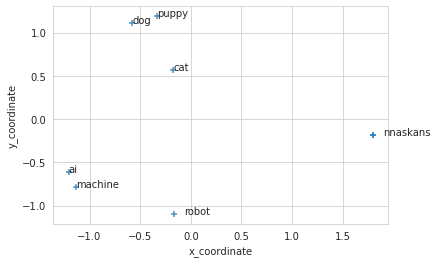

In [383]:
example_words = ["cat", "dog", "puppy", "robot", "ai", "machine", "","nnaskans"]
plot_graph(
  vectors = list(map(lambda word: get_wordnet_vector_for_word(word, wordnet_vocabulary, wordnet_vectors), example_words)),
  labels = example_words,
)

# Machine Learning Task (using WordNet Vectors)

In [0]:
animals = [
  "dog",
  "cat",
  "person",
  "rabbit",
]
not_animals =[
  "machine",
  "robot",
  "robot",
  "ai"              
]

training_inputs = list(
  map(
    lambda word: get_wordnet_vector_for_word(word, wordnet_vocabulary, wordnet_vectors),
    animals + not_animals 
  )
)
training_output_labels = ["animal"]*len(animals) + ["not_animal"]*len(not_animals)

In [398]:
list(zip(animals + not_animals, training_outputs))

[('dog', 'animal'),
 ('cat', 'animal'),
 ('person', 'animal'),
 ('rabbit', 'animal'),
 ('machine', 'not_animal'),
 ('robot', 'not_animal'),
 ('robot', 'not_animal'),
 ('ai', 'not_animal')]

In [389]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(training_inputs, training_output_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [401]:
word = ""
while word != "exit":
  word = input(">")
  print(
    svm_classifier.predict(
      [get_wordnet_vector_for_word(
        word = word, 
        vocabulary = wordnet_vocabulary, 
        vectors = wordnet_vectors
      )]
    )[0]
  )

>car
not_animal
>motorbike
not_animal
>cat
animal
>kitten
animal
>exit
animal
